In [1]:
# importing the necessary packages
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd
import os
import sys
import warnings 

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/home/rohit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

##### The data is collected from various source as that would help us generalise the model. If the model was trained only on one type of data then the model would be bias towards that type of data iteslf. 
A little change in the audio quality may lead to incorrectly predicting the emotion

In [2]:
# directory for different datasets
SAVEE = "/home/rohit/Desktop/audio_emotion/SAVEE/"
TESS = "/home/rohit/Desktop/audio_emotion/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/home/rohit/Desktop/audio_emotion/RAVDESS/audio_speech_actors_01-24/"
CREMA = "/home/rohit/Desktop/audio_emotion/CREMA-D/AudioWAV/"

### SAVEE dataset

In [3]:
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['JE_h11.wav', 'JK_a05.wav', 'JK_n22.wav', 'KL_d06.wav', 'DC_su15.wav']

#### The audio files are named in such a way that the prefix letters describe the emotion classes of the audio file

1) a = 'anger'

2) d = 'disgust'

3) f = 'fear'

4) h = 'happiness'

5) n = 'neutral'

6) sa = 'sadness'

7) su = 'surprise'

The -8th and -7th letter of the file(JE_h11.wav) name is _h which indicates that the audio file contains happy emotion.

In [4]:
# getting the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parsing the file name to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

In [5]:
# making a dataframe containing columns  - labels. source, path
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_happy        60
male_sad          60
male_disgust      60
male_angry        60
male_surprise     60
male_fear         60
Name: labels, dtype: int64

In [6]:
# viewing first few rows of the dataframe
SAVEE_df.head()

labels source                                               path
0     male_happy  SAVEE  /home/rohit/Desktop/audio_emotion/SAVEE/JE_h11...
1     male_angry  SAVEE  /home/rohit/Desktop/audio_emotion/SAVEE/JK_a05...
2   male_neutral  SAVEE  /home/rohit/Desktop/audio_emotion/SAVEE/JK_n22...
3   male_disgust  SAVEE  /home/rohit/Desktop/audio_emotion/SAVEE/KL_d06...
4  male_surprise  SAVEE  /home/rohit/Desktop/audio_emotion/SAVEE/DC_su1...

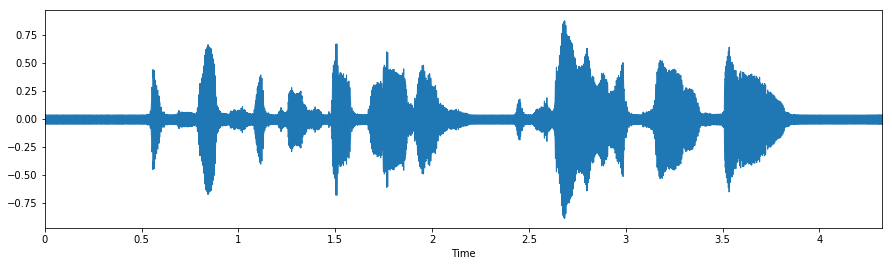

In [7]:
# having a look at the type of data to understand the quality of data
fname = SAVEE + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15,4))
librosa.display.waveplot(data, sr=sampling_rate)

# listening to the audio
ipd.Audio(fname)

After listening to the audio it is clear that the emotion is fear

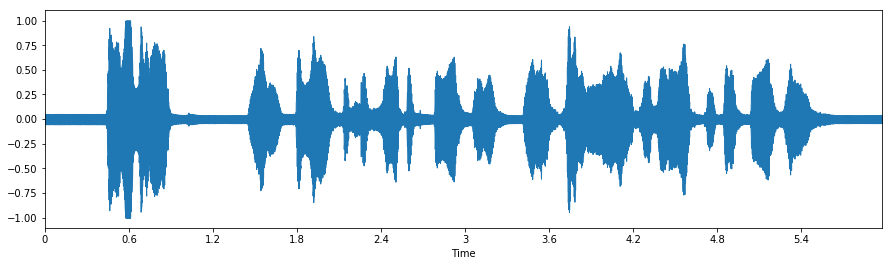

In [8]:
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15,4))
librosa.display.waveplot(data, sr=sampling_rate)

# listening to the audio
ipd.Audio(fname)

After listening to the audio it is clear that the emotion is Happy

The wave form is different for Happy and Fear. This shows that there is a possibility to classify emotions which are in the form of audio

#  

#  

### RAVDESS dataset

RAVDESS dataset is the recording of 24 different actors of different genders.
File name is used to get various information about the audio

1) Modality :- 01 = full-AV, 02 = video-only, 03 = audio-only

2) Vocal channel :- 01 = speech, 02 = song

3) Emotion :- 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised 

4) Emotional intensity :- 01 = normal, 02 = strong

5) Statement :- 01 = "kids are talking by the door,  02 = "Dogs are sitting by the door"

6) Repetition :- 01 = 1st repetition, 02 = 2nd repetition

7) Actor :- odd numbers are make and even numbers are female


filename: 02-01-06-01-02-01-12.mp4

02 = Video-only

01 = Speech

06 = Fearful

01 = Normal intensity

02 = "Dogs are sitting by the door"

01 = 1st repetition

12 = Female actor (Even number)

In [9]:
# directory path

dir_list = os.listdir(RAV)
dir_list.sort()
dir_list[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [10]:
# labeling the data using filename
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_sad            96
male_happy          96
female_sad          96
male_angry          96
male_surprise       96
male_fear           96
female_fear         96
female_disgust      96
female_happy        96
female_surprise     96
female_angry        96
male_disgust        96
Name: labels, dtype: int64

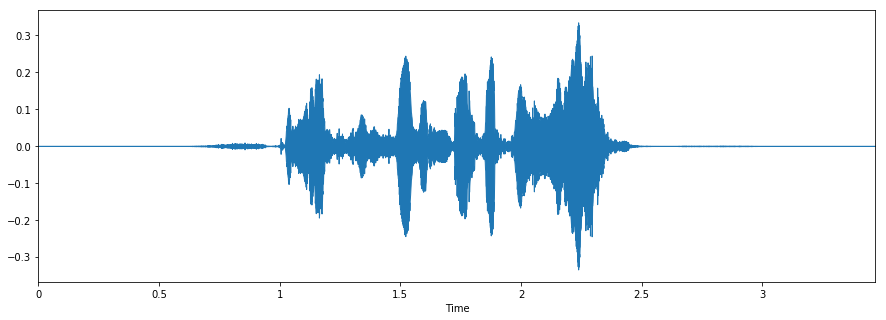

In [11]:
# fearful track
fname = RAV +'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# playing the audio
ipd.Audio(fname)

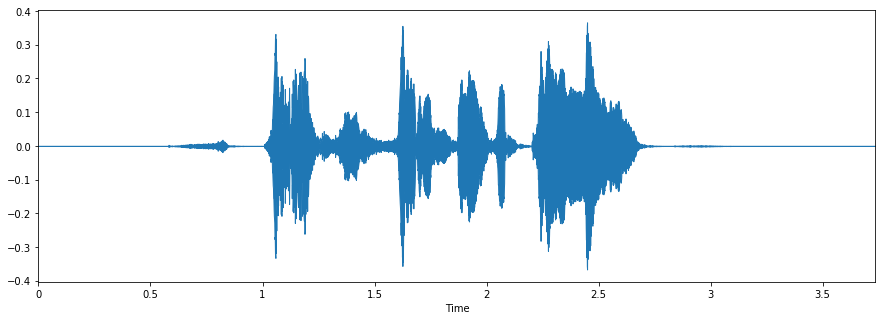

In [12]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

I could not differentiate between fearful and happy but we can see through the image that the image that there are  more high amplitude in happy track at various points.

There are data for both male and female gender which would help us avoid gender bias in the model.

#  

#   

### TESS 

The data is of two female gender : young female and old female.

This would help us balance the data for both male and female as SAVEE dataset had only male data

In [13]:
# directory to access files
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [14]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_neutral     400
female_sad         400
female_disgust     400
female_happy       400
female_surprise    400
female_angry       400
female_fear        400
Name: labels, dtype: int64

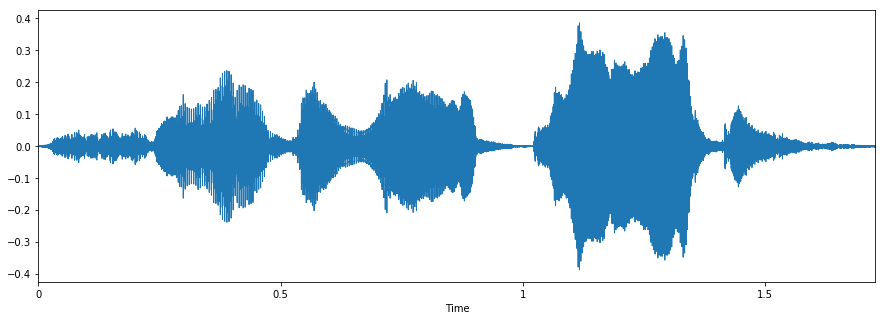

In [15]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

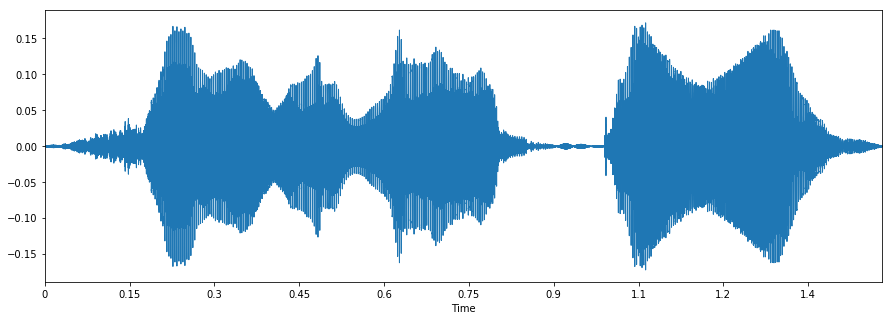

In [16]:
# lets play a fearful track 
fname = TESS + 'OAF_Fear/OAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

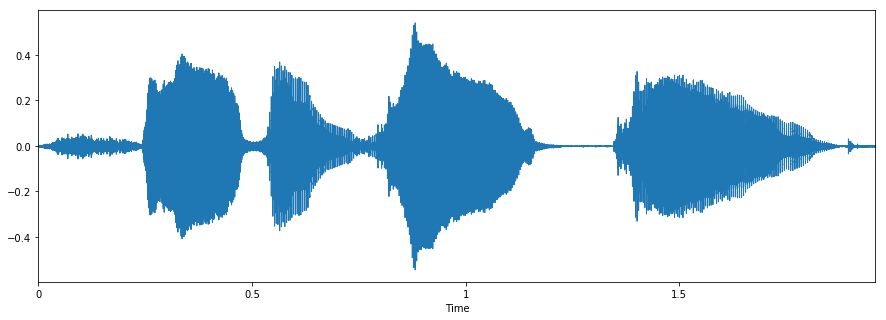

In [17]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

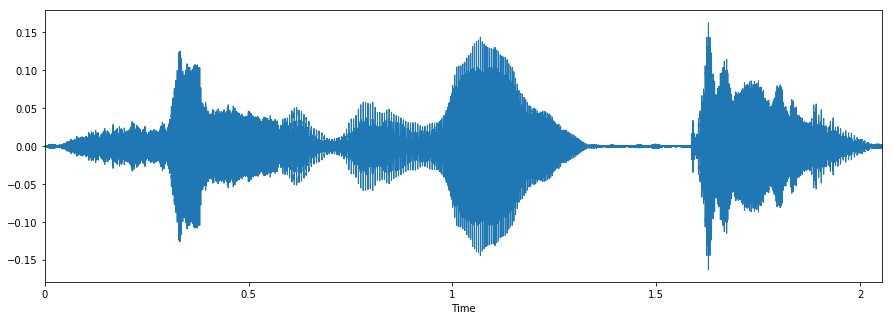

In [18]:
# lets play a happy track 
fname =  TESS + 'OAF_happy/OAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

The data is of female gender that are of young lady and old lady. This has helped us balancing the male and female dataset.

#   

#  

### CREMA-D  

The data is taken from various speakers of different movies. The dataset is large which means alot of data to train the model on and different speaker will help in generalising the model.

In [19]:
# the directory for CREMA dataset
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [21]:
# to label the emotion, gender and path using the filename
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()



male_happy        671
male_sad          671
male_angry        671
male_fear         671
male_disgust      671
female_sad        600
female_disgust    600
female_fear       600
female_happy      600
female_angry      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

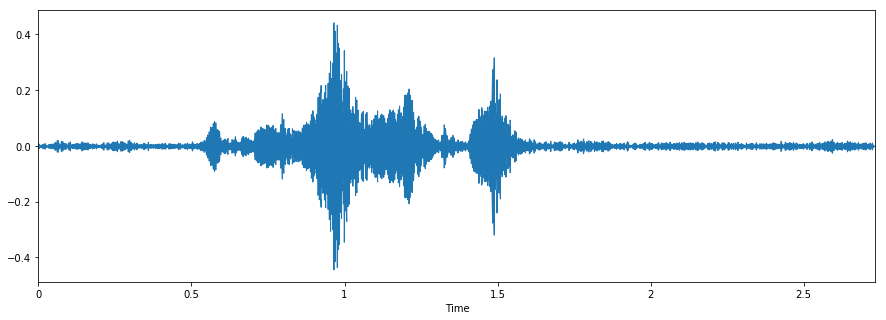

In [22]:
# audio of female gender with happy emotion 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

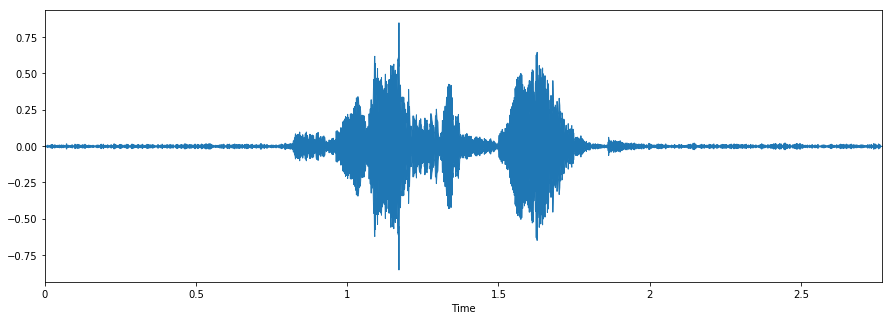

In [23]:
# audio of female gender with fear emotion 
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

The data are of larger volumne which can help in better training. But the data has some disturbances like echoing, background noise, etc

#  

#  

#  

In [24]:
# combining the dataframe of all the dataframe

df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_disgust     1096
female_fear        1096
female_sad         1096
female_happy       1096
female_angry       1096
female_neutral     1056
male_neutral        839
male_sad            827
male_fear           827
male_disgust        827
male_happy          827
male_angry          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


The data are fairly balanced except for the suprise emotion for both male and female gender. 

The data is of different races and ethnicities which can help us in building a generalised model.

#   

#   

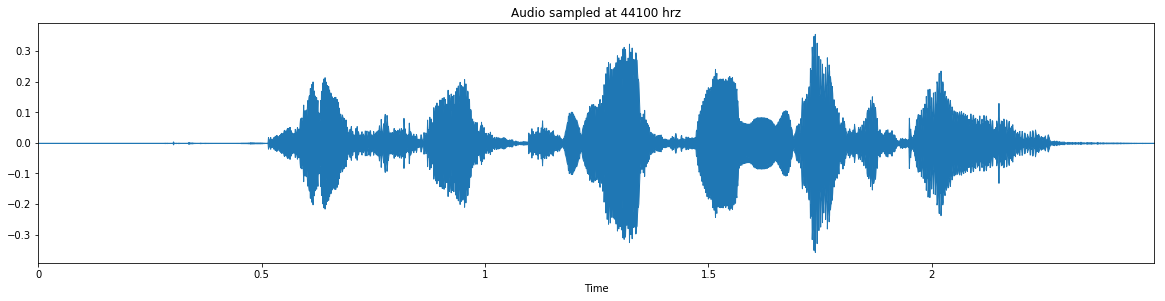

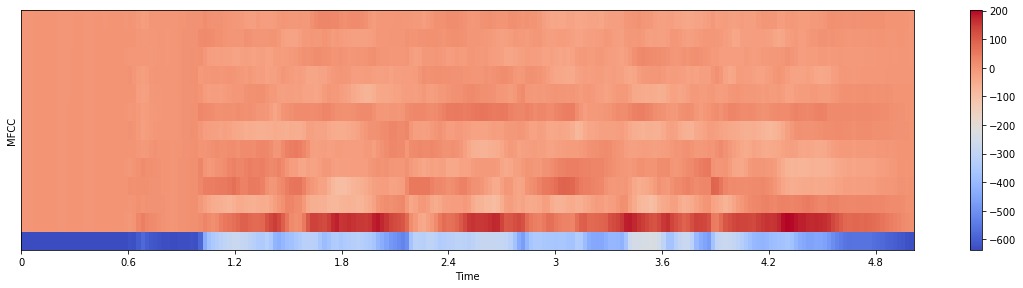

In [25]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

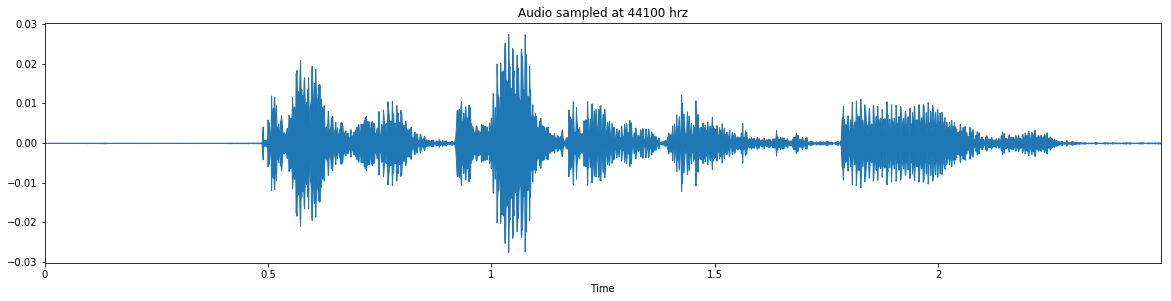

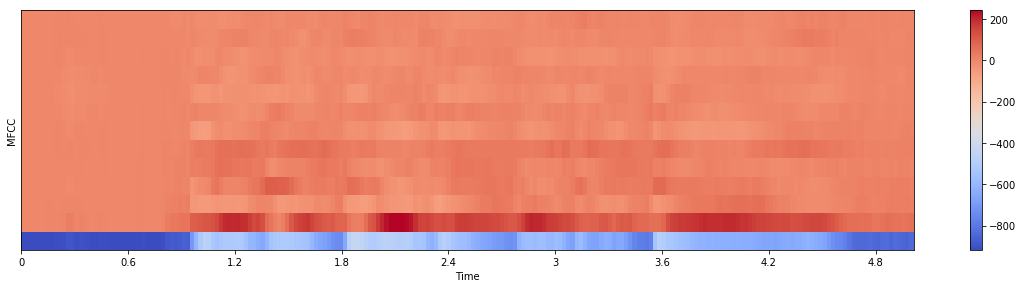

In [26]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

#  

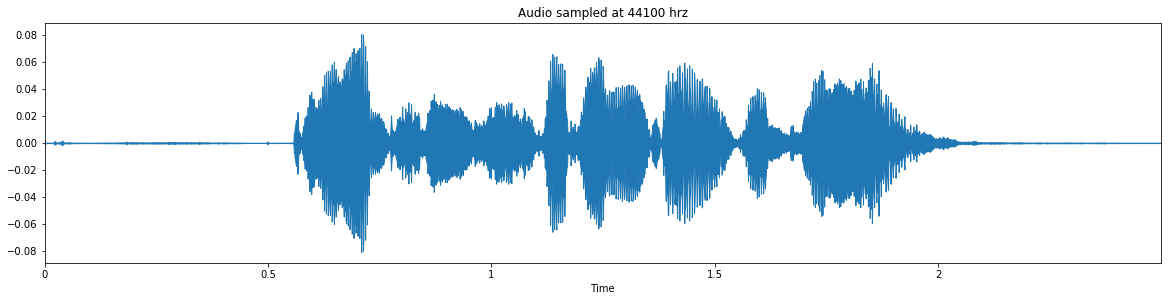

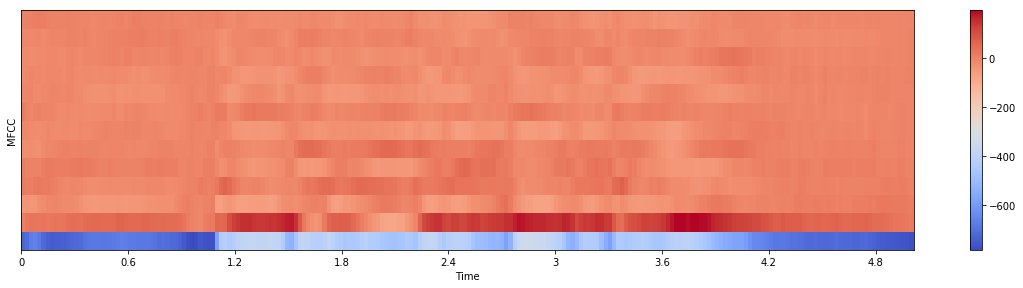

In [28]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

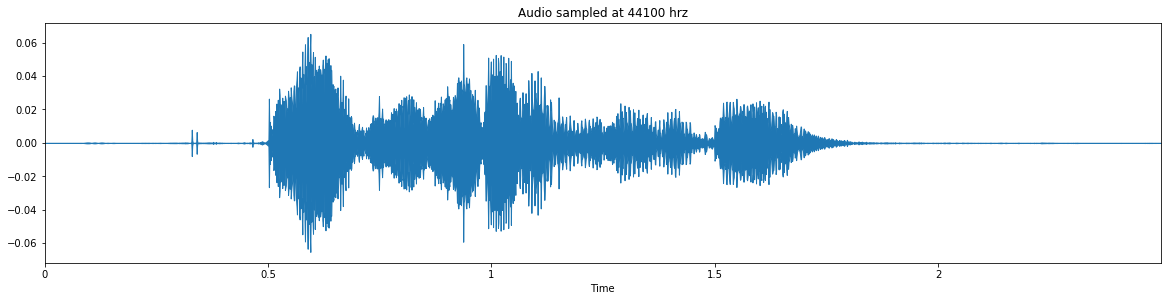

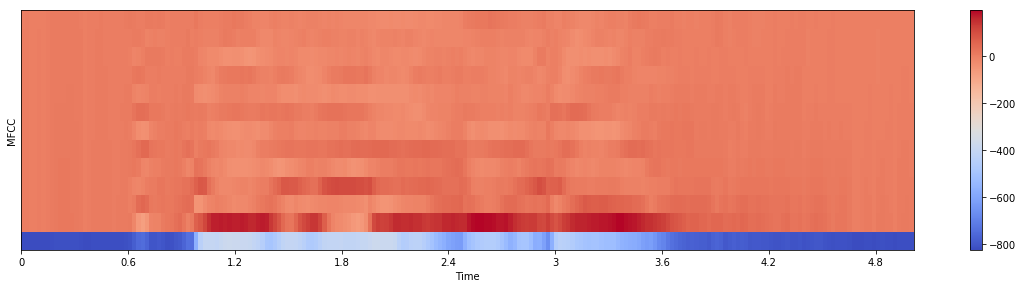

In [31]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

#  

216
216


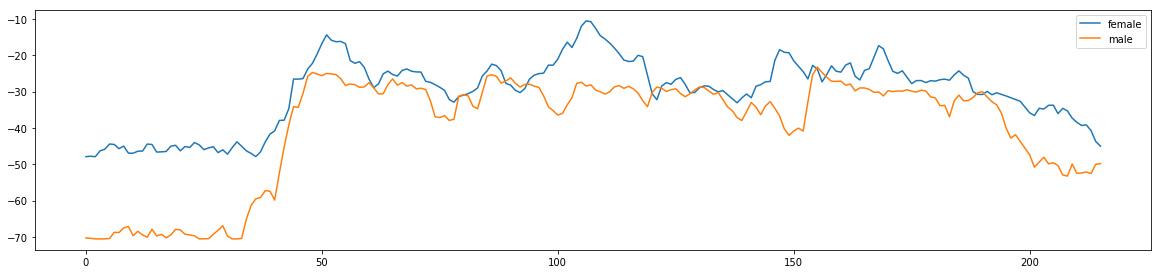

In [32]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

There is difference in the pitch of the audio of male and female for the same emotion and same words uttered

216
216


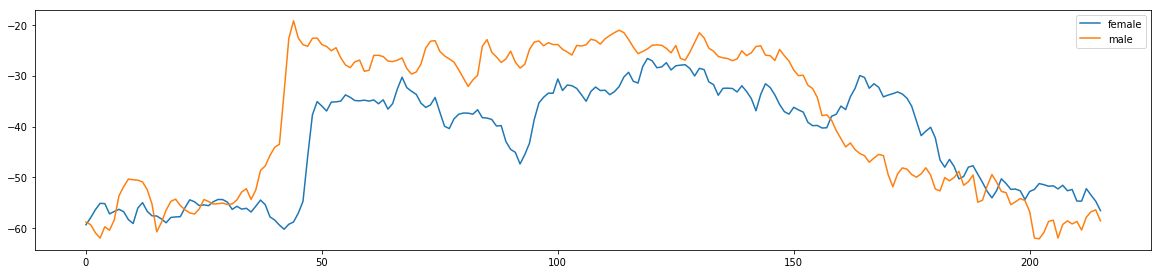

In [35]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/home/rohit/Desktop/audio_emotion/RAVDESS/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

We can clearly see that the pitch for same sentence uttered is different for male and female. 